In [18]:
import sys

sys.path.append('../')

In [61]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torch.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.optim import RMSProp, Momentum, Adam, SGD
from sklearn.datasets import fetch_openml

np.random.seed(54)

sns.set_theme()

In [10]:
df = pd.read_csv('mnist.csv').to_numpy()

In [11]:
Y = np.array(pd.get_dummies(df[:, -1]))
X = np.array(df[:, :-1])
X = (X / 255).astype('float32')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
df = pd.DataFrame({
    'Epoch': [],
    'Activation Function': [],
    'Train Loss': [],
    'Test Loss': [],
    'Train Accuracy': [],
    'Test Accuracy': []
})

# Tanh

In [20]:
model = nn.Sequential(
    nn.Linear(784, 200),
    nn.Tanh(),

    nn.Linear(200, 80),
    nn.Tanh(),

    nn.Linear(80, 10),
    nn.SoftMax(),
)

# Params
epochs = 20
eval_every = 1
batch_size = 1024
criterion = nn.CrossEntropy()

optimizer = Adam(model)

for epoch in range(epochs):
    for x, y in DataLoader(X_train, Y_train, batch_size=batch_size):
        y_pred = model.forward(x)
        grad = criterion.backward(y_pred, y)
        model.backward(x, grad)

        optimizer.step(lr=0.003, beta1=0.9, beta2=0.999)

    if (epoch + 1) % eval_every == 0:
        y_train_pred = model.forward(X_train)
        y_test_pred = model.forward(X_test)
        loss_train = criterion.forward(y_train_pred, Y_train)
        loss_test = criterion.forward(y_test_pred, Y_test)
        print(f'Epoch: {epoch + 1}/{epochs}')
        print(f'Train Loss: {loss_train} Train Accuracy: {accuracy_score(Y_train, y_train_pred)}')
        print(f'Test Loss: {loss_test} Test Accuracy: {accuracy_score(Y_test, y_test_pred)} \n')
        
        df = df.append(pd.Series({
            'Epoch': epoch,
            'Activation Function': 'Tanh',
            'Train Loss': loss_train,
            'Test Loss': loss_test,
            'Train Accuracy': accuracy_score(Y_train, y_train_pred),
            'Test Accuracy': accuracy_score(Y_test, y_test_pred),
        }, name=False))

Epoch: 1/20
Train Loss: 3.0404455260648704 Train Accuracy: 0.6820178571428571
Test Loss: 3.1519782903418165 Test Accuracy: 0.6722857142857143 

Epoch: 2/20
Train Loss: 2.5006620579616228 Train Accuracy: 0.7835535714285714
Test Loss: 2.650619990046385 Test Accuracy: 0.7718571428571429 

Epoch: 3/20
Train Loss: 2.3519895267437168 Train Accuracy: 0.8205
Test Loss: 2.5074158980281256 Test Accuracy: 0.8122857142857143 

Epoch: 4/20
Train Loss: 2.1552517038431045 Train Accuracy: 0.8479642857142857
Test Loss: 2.301065671627551 Test Accuracy: 0.8392857142857143 

Epoch: 5/20
Train Loss: 2.041771008090342 Train Accuracy: 0.8645
Test Loss: 2.2228643113337996 Test Accuracy: 0.8537142857142858 

Epoch: 6/20
Train Loss: 1.8951032369927434 Train Accuracy: 0.8784821428571429
Test Loss: 2.070562571564924 Test Accuracy: 0.8700714285714286 

Epoch: 7/20
Train Loss: 1.786164281297809 Train Accuracy: 0.891375
Test Loss: 1.9935718584697482 Test Accuracy: 0.8800714285714286 

Epoch: 8/20
Train Loss: 1.67818

# Sigmoid

In [21]:
model = nn.Sequential(
    nn.Linear(784, 200),
    nn.Sigmoid(),

    nn.Linear(200, 80),
    nn.Sigmoid(),

    nn.Linear(80, 10),
    nn.SoftMax(),
)

# Params
epochs = 20
eval_every = 1
batch_size = 1024
criterion = nn.CrossEntropy()

optimizer = Adam(model)

for epoch in range(epochs):
    for x, y in DataLoader(X_train, Y_train, batch_size=batch_size):
        y_pred = model.forward(x)
        grad = criterion.backward(y_pred, y)
        model.backward(x, grad)

        optimizer.step(lr=0.003, beta1=0.9, beta2=0.999)

    if (epoch + 1) % eval_every == 0:
        y_train_pred = model.forward(X_train)
        y_test_pred = model.forward(X_test)
        loss_train = criterion.forward(y_train_pred, Y_train)
        loss_test = criterion.forward(y_test_pred, Y_test)
        print(f'Epoch: {epoch + 1}/{epochs}')
        print(f'Train Loss: {loss_train} Train Accuracy: {accuracy_score(Y_train, y_train_pred)}')
        print(f'Test Loss: {loss_test} Test Accuracy: {accuracy_score(Y_test, y_test_pred)} \n')
        
        df = df.append(pd.Series({
            'Epoch': epoch,
            'Activation Function': 'Sigmoid',
            'Train Loss': loss_train,
            'Test Loss': loss_test,
            'Train Accuracy': accuracy_score(Y_train, y_train_pred),
            'Test Accuracy': accuracy_score(Y_test, y_test_pred),
        }, name=False))

Epoch: 1/20
Train Loss: 1.5334017511301214 Train Accuracy: 0.7385535714285715
Test Loss: 1.6178830332035308 Test Accuracy: 0.7325 

Epoch: 2/20
Train Loss: 1.4488205354804458 Train Accuracy: 0.8250357142857143
Test Loss: 1.5278839186501758 Test Accuracy: 0.8194285714285714 

Epoch: 3/20
Train Loss: 1.4083264468183212 Train Accuracy: 0.8628035714285714
Test Loss: 1.4950088172119482 Test Accuracy: 0.8587857142857143 

Epoch: 4/20
Train Loss: 1.3684240396117455 Train Accuracy: 0.8850714285714286
Test Loss: 1.4609844751224976 Test Accuracy: 0.8797857142857143 

Epoch: 5/20
Train Loss: 1.2850875973076408 Train Accuracy: 0.9014821428571429
Test Loss: 1.384006318351129 Test Accuracy: 0.8964285714285715 

Epoch: 6/20
Train Loss: 1.2722127117047808 Train Accuracy: 0.9109285714285714
Test Loss: 1.3702079258554412 Test Accuracy: 0.9042857142857142 

Epoch: 7/20
Train Loss: 1.2166040673410445 Train Accuracy: 0.9198035714285714
Test Loss: 1.3163331002591003 Test Accuracy: 0.9126428571428571 

Epoch

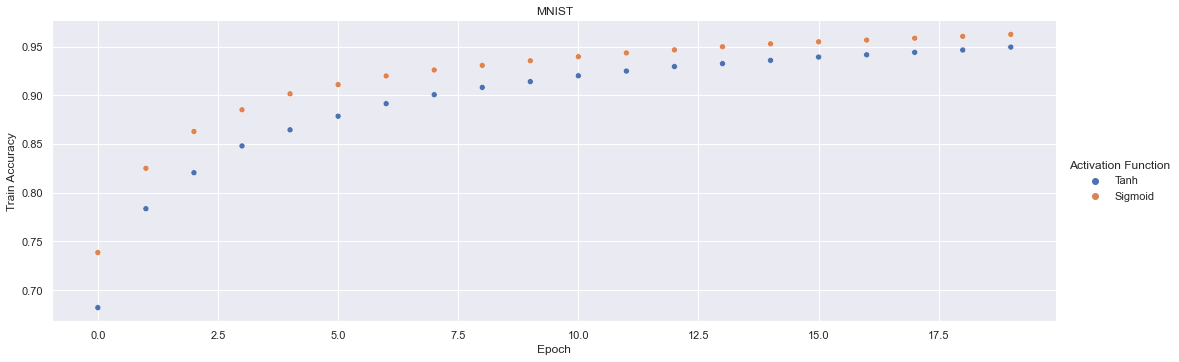

In [72]:
sns_plot = sns.relplot(data=df, x='Epoch', y='Train Accuracy', 
                        hue='Activation Function', kind='scatter', aspect=3,
                       ).set(title='MNIST')

In [70]:
sns_plot.savefig('output.png')